# Uber Data Analysis

## Importing

In [1]:
%pylab inline
# Data manipulation
import pandas
# Plot
import seaborn

Populating the interactive namespace from numpy and matplotlib


## Load CSV file to Memory

In [12]:
data = pandas.read_csv(r'H:\Documents\Programmation\Python\uber_data_analysis\uber-raw-data-apr14.csv')

In [13]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### Date : from string to right type

#### Version 1 : Using split and cast

In [21]:
dt = "4/1/2014 0:11:00"

In [22]:
d,t = dt.split(" ")
month,day,year = d.split("/")

In [23]:
print(int(month))
print(int(day))
print(int(year))

4
1
2014


Conclusion : hard to work with this way. We can use Pandas to make it easier.

#### Version 2 : Using Pandas

In [31]:
dt = pandas.to_datetime(dt)

In [35]:
print(dt.month)
print(dt.day)
print(dt.year)

4
1
2014


Conclusion : lots of functionalities, way more easier.

## Converting Date/Time to good format + Adding useful colums
### Converting Date/Time column

In [37]:
data["Date/Time"] = data["Date/Time"].map(pandas.to_datetime)

### Creating a function to get the day of the month, adding it to the dataset

In [39]:
def getDayOfMonth(dt):
    return dt.day

data["dayofmonth"] = data["Date/Time"].map(getDayOfMonth)

### Same for weekday

In [47]:
def getWeekday(dt):
    return dt.weekday()

data["weekday"] = data["Date/Time"].map(getWeekday)

### Same for hour

In [48]:
def getHour(dt):
    return dt.hour

data["hour"] = data["Date/Time"].map(getHour)

## Analysis

### Day of the Month analysis

Text(0.5,1,'Frequency by the day of the month')

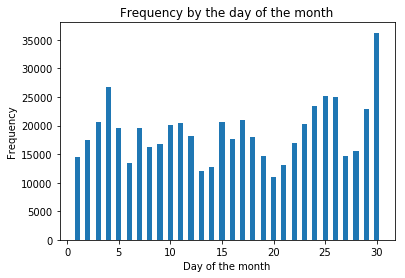

In [59]:
hist(data.dayofmonth, bins=30, rwidth=0.5, range=(0.5,30.5))
xlabel("Day of the month")

ylabel("Frequency")
title("Frequency by the day of the month")

In [62]:
def countRows(rows):
    return len(rows)

by_day = data.groupby("dayofmonth").apply(countRows)
by_day

dayofmonth
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [67]:
by_day_sorted = by_day.sort_values()
by_day_sorted

dayofmonth
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

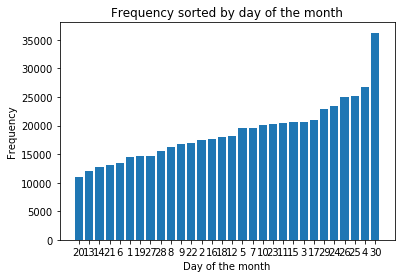

In [80]:
bar(range(1,31),by_day_sorted)
xticks(range(1,31), by_day_sorted.index);
xlabel("Day of the month")
ylabel("Frequency")
title("Frequency sorted by day of the month");

### Hour analysis

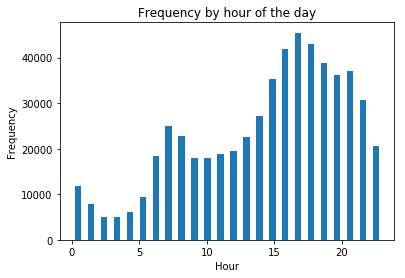

In [105]:
hist(data.hour, bins=24, rwidth=0.5);
xlabel("Hour");
ylabel("Frequency");
title("Frequency by hour of the day");

### Weekday analysis

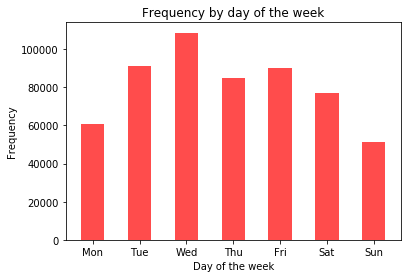

In [110]:
hist(data.weekday, bins=7, range=(-.5, 6.5), rwidth=0.5, color='red', alpha=0.7);
xticks(range(7), "Mon Tue Wed Thu Fri Sat Sun".split(' '));
xlabel("Day of the week");
ylabel("Frequency");
title("Frequency by day of the week");

## Cross Analysis

### Hour/Day of the month

In [120]:
by_weekday_hour = data.groupby("weekday hour".split()).apply(countRows).unstack()

by_weekday_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


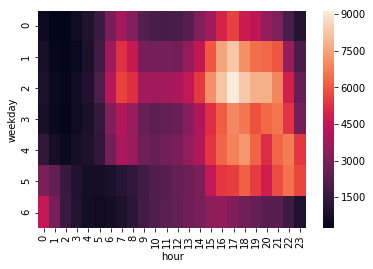

In [121]:
seaborn.heatmap(by_weekday_hour)

### Latitude and longitude

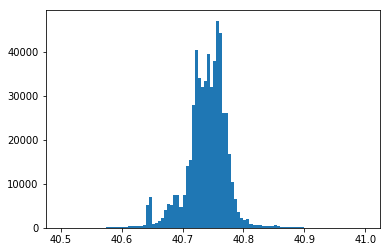

In [129]:
hist(data["Lat"], bins=100, range = (40.5,41));

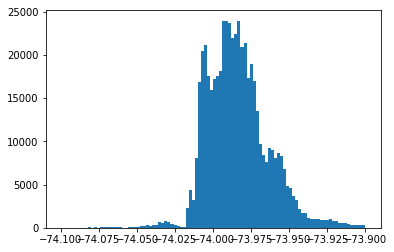

In [140]:
hist(data['Lon'], bins=100, range=(-74.1,-73.9));

''

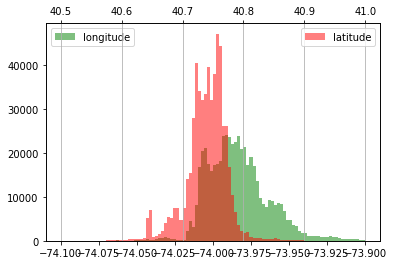

In [154]:
hist(data['Lon'], bins=100, range=(-74.1,-73.9), color="green", alpha=0.5, label='longitude')
legend(loc='upper left')
twiny()
hist(data["Lat"], bins=100, range = (40.5,41), color="red", alpha=0.5, label='latitude')
legend(loc='best')
grid()
;

(0, 100)

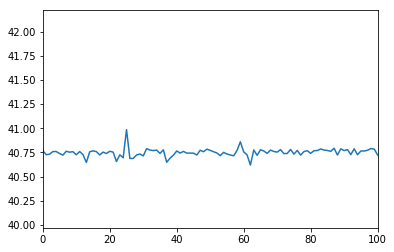

In [158]:
plot(data['Lat'])
xlim(0,100)

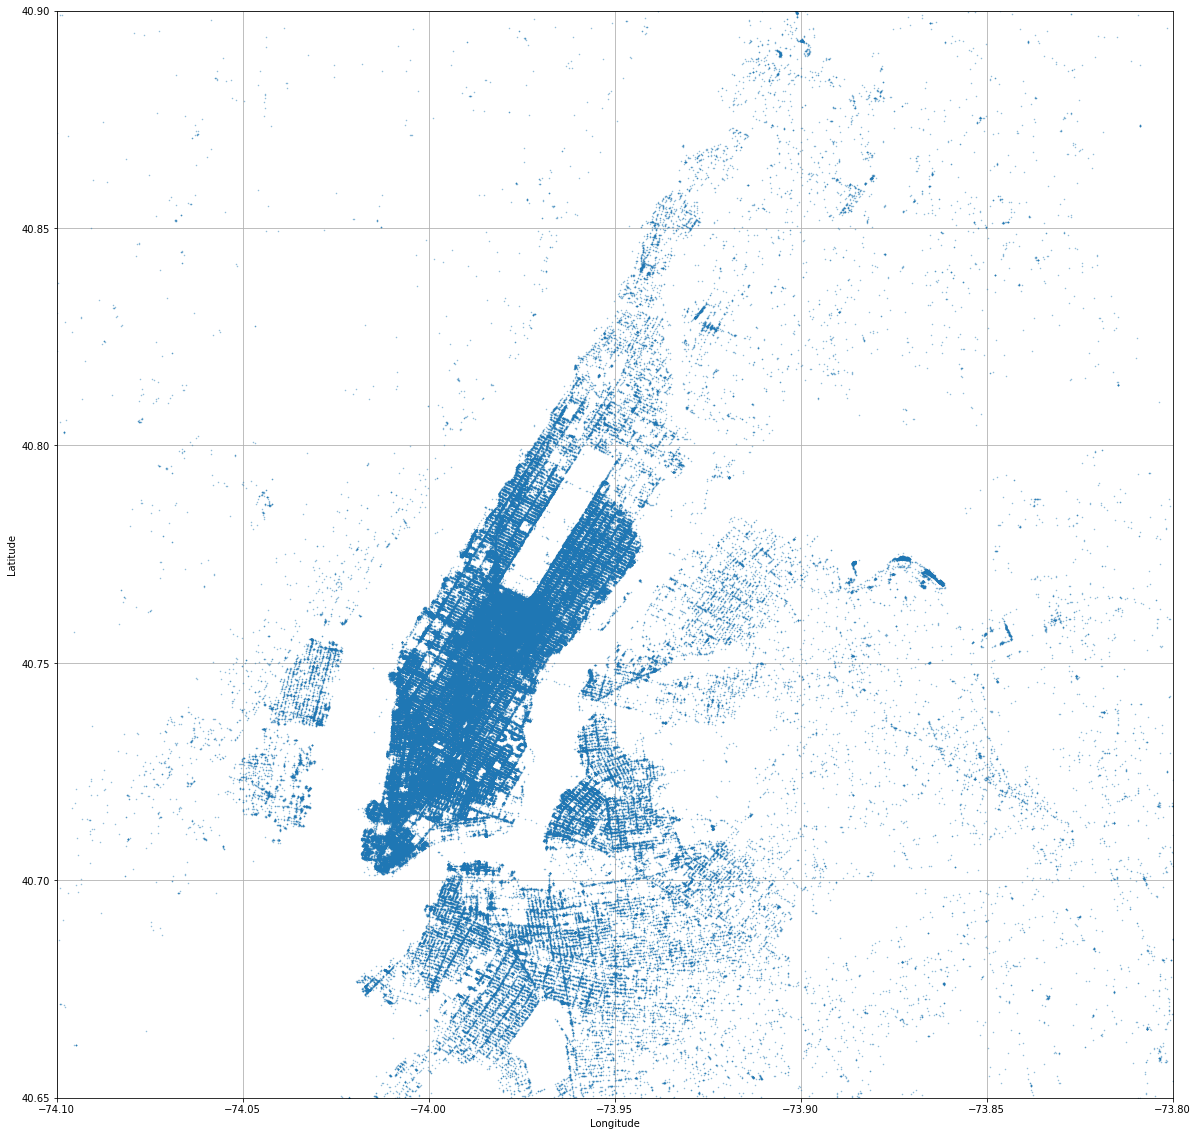

In [179]:
figure(figsize=(20,20))
plot(data["Lon"],data["Lat"], ".", ms=1, alpha=.5)
xlim(-74.1,-73.8)
xlabel("Longitude")
ylabel("Latitude")
ylim(40.65,40.9)
grid()